In [10]:
import hepi
print(hepi.__version__)
import smpl
import numpy as np
import hepi.util as util
import matplotlib.pyplot as plt
import copy
from hepi.run import nnllfast as nnll
# set the folder where the resummino binary can be found either in either ./{,bin,bin/build}/resummino
nnll.set_path("/home/apn/git/nnll-fast/nnll-fast")
# By default hepi will run with nice -n5 to prevent overloading the system if more scans than cores are running
#rs.set_pre("") disables any prefixing with nice
print (nnll.get_path())
from hepi.run import nllfast as nll
# set the folder where the resummino binary can be found either in either ./{,bin,bin/build}/resummino
nll.set_path("/home/apn/git/nll-fast/nll-fast")
# By default hepi will run with nice -n5 to prevent overloading the system if more scans than cores are running
#rs.set_pre("") disables any prefixing with nice
print (nll.get_path())

0.2.10.6
/home/apn/git/nnll-fast/nnll-fast
/home/apn/git/nll-fast/nll-fast


/home/apn/git/HEPi/hepi/util.py:101: UserWarning: LHAPDF python binding not installed? Make sure you set PYTHONPATH correctly (i.e. correct python version) if you want to compute PDF uncertainties.
  warnings.warn(


Checking input:   0%|          | 0/16 [00:00<?, ?it/s]

Preparing:   0%|          | 0/16 [00:00<?, ?it/s]

Skipped: 0 Not skipped: 16


Running:   0%|          | 0/16 [00:00<?, ?it/s]

Parsing:   0%|          | 0/16 [00:00<?, ?it/s]

Checking input:   0%|          | 0/16 [00:00<?, ?it/s]

Preparing:   0%|          | 0/16 [00:00<?, ?it/s]

Skipped: 0 Not skipped: 16


Running:   0%|          | 0/16 [00:00<?, ?it/s]

Parsing:   0%|          | 0/16 [00:00<?, ?it/s]

CPU times: user 1.07 s, sys: 95.8 ms, total: 1.17 s
Wall time: 1.25 s


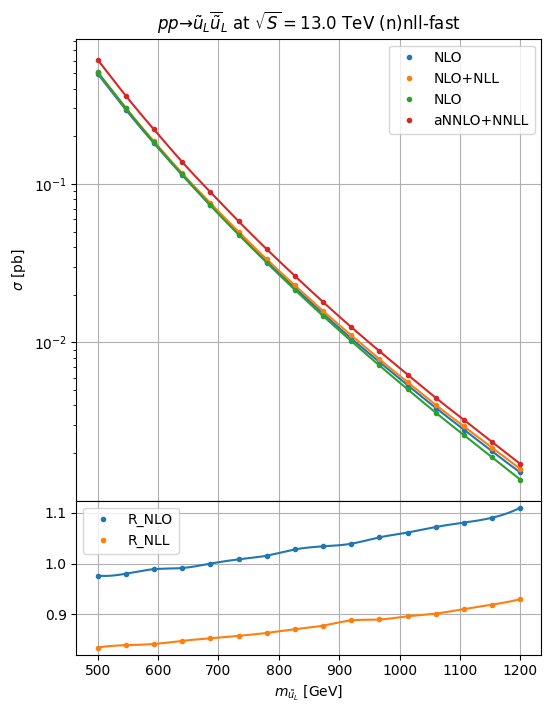

In [22]:
%%time
params = [
    "mastercode_with_gm2.in", # baseline slha file in the relative ./output folder by default unless set_output_dir was used 
]
pss = [    
      (1000002,-1000002), # Final state particles for resummino to run
     ]

for pa,pb in pss:
    for param in params:
        # All the inputs Order, CMS in GeV, particle 1, particle 2, slha, pdf_lo, pdf_nlo,mu_f, mu_r
        i = hepi.Input(hepi.Order.NLO_PLUS_NLL,13000,pa,pb,param,"cteq6l1","cteq66",1., 1.,id=4)
        ii = hepi.Input(hepi.Order.NLO_PLUS_NLL,13000,pa,pb,param,"PDF4LHC15","PDF4LHC15",1., 1.,id=1)
        li = [i] # li is our list of inputs that we want resummino to run
        li = hepi.mass_scan(li,1000021, np.linspace(10000,20000,1))
        li = hepi.mass_scan(li,pa, np.linspace(500,1200,16))
        nll_dl = nll.run(li,skip=False,n_jobs=1) # run resummino, skipping if the result already exists.
        lli =  [ii]
        lli = hepi.mass_scan(lli,1000021, np.linspace(10000,20000,1))
        lli = hepi.mass_scan(lli,pa, np.linspace(500,1200,16))
        nnll_dl = nnll.run(lli,skip=False,n_jobs=1) # run resummino, skipping if the result already exists.
        # rs_dl is a panda table(dataframe) with all inputs and result 
        _,axs = hepi.init_double_plot()
        nll_dl["R_NLO"] = nll_dl["NLO"]/nnll_dl["NLO"]
        nll_dl["R_NLL"] = nll_dl["NLO_PLUS_NLL"]/nnll_dl["aNNLO_PLUS_NNLL"]
        # hepi has some useful plotting routines, but the results from rs_dl can easily be accessed
        # Now plot the mass of PDG id pa from the results at LO ,NLO and aNNLO+NLL
        hepi.mass_plot(nll_dl,["NLO","NLO_PLUS_NLL"],pa,axes=axs[0],tight=False,cont=True)
        hepi.mass_plot(nnll_dl,["NLO","aNNLO_PLUS_NNLL"],pa,axes=axs[0],tight=False,cont=True)
        # Plot K factors vs LO and aNNLO+NLL/NLO
        hepi.mass_plot(nll_dl,["R_NLO","R_NLL"],pa, yaxis=None, axes=axs[1],logy=False,tight=False)
        # construct a title from the inputs
        hepi.title(li[0],axs[0],scenario="(n)nll-fast",pdf_info=False)

In [12]:
lli

In [13]:
lli